<a href="https://colab.research.google.com/github/HLapendery/FootballAnalysis/blob/master/HandbookCopy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data collection from StatsBomb github

Importing needed libraries

In [0]:
import pandas as pd
from tqdm import tqdm
import requests as rq

Indexing available competitions

In [0]:
comps_url = "https://raw.githubusercontent.com/statsbomb/open-data/master/data/competitions.json"

df_comps = pd.read_json(comps_url)

Find infos for the 2018 world cup

In [26]:
df_comps[df_comps['competition_name'] == 'FIFA World Cup']


,competition_id,season_id,country_name,competition_name,competition_gender,season_name,match_updated,match_available
2,43,3,International,FIFA World Cup,male,2018,2019-12-16T23:09:16.168756,2019-12-16T23:09:16.168756


Parse data

In [0]:
base_url = "https://raw.githubusercontent.com/statsbomb/open-data/master/data/"
comp_url = base_url + "matches/{}/{}.json"
match_url = base_url + "events/{}.json"

def parse_data(competition_id, season_id):
    matches = rq.get(url=comp_url.format(competition_id, season_id)).json()
    match_ids = [m['match_id'] for m in matches]

    all_events = []
    for match_id in tqdm(match_ids):

        events = rq.get(url=match_url.format(match_id)).json()

        shots = [x for x in events if x['type']['name'] == "Shot"]
        for s in shots:
            attributes = {
                "match_id": match_id,
                "team": s["possession_team"]["name"],
                "player": s['player']['name'],
                "x": s['location'][0],
                "y": s['location'][1],
                "outcome": s['shot']['outcome']['name'],
            }
            all_events.append(attributes)
            
    return pd.DataFrame(all_events)

In [57]:
df = parse_data(43,3)

100%|██████████| 64/64 [00:35<00:00,  1.78it/s]


In [68]:
df_save = df.copy()
df.shape
df.head()
df_save.head()

,match_id,team,player,x,y,outcome
0,7562,Australia,Mile Jedinak,97.0,53.0,Off T
1,7562,Australia,Tom Rogić,95.0,46.0,Blocked
2,7562,Peru,André Martín Carrillo Díaz,104.0,53.0,Goal
3,7562,Australia,Mathew Leckie,112.0,42.0,Wayward
4,7562,Peru,José Paolo Guerrero González,109.0,37.0,Saved


In [0]:

df['x'] = list(map(lambda x: x-20,df['x']))
df['y'] = list(map(lambda x: x-10,df['y']))

In [0]:
!pip install matplotsoccer

Plotting a soccer field
105 x 68

ValueError: ignored

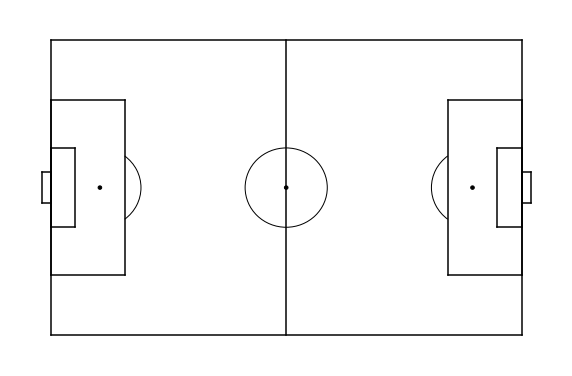

In [73]:
import matplotlib.pyplot as plt
import matplotsoccer
nb = 100
matplotsoccer.field(figsize=10, show=False)
plt.scatter(df['x'][:nb],df['y'][:nb],c = df['match_id'])
plt.axis("on")
plt.show()